In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

# Observe the data


In [2]:
df = pd.read_csv('./data/voice.csv')

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Preprocessing

Create X matrix for features and y as target 

In [4]:
# Divide the features and target
X, y = df[df.columns[:-1]], df['label']
# Reassign the target variables 
y = y.replace({'male':1,'female':0})

Check the distribution of classes and missing values

In [5]:
# Checking the distribution of labels
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))


Number of male: 1584
Number of female: 1584


In [6]:
# Checking for missing values
# df.isnull().sum()
# OR
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


Visualising data


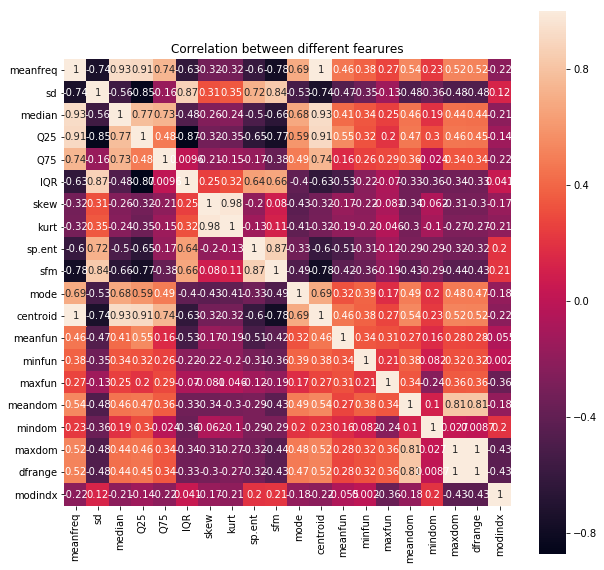

In [7]:
# Creating a correlation matrix 
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True,annot=True)
plt.title('Correlation between different fearures')


In [8]:
# Observe the count, mean, std, min, max
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


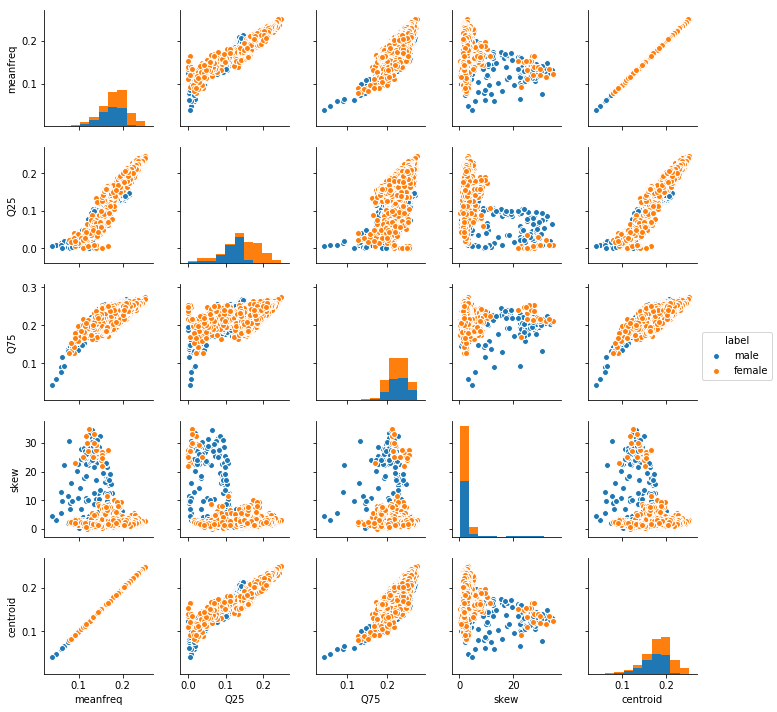

In [9]:
# Observe some important features as compared to others
sns.pairplot(df[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', size=2)

Scaling the features


In [10]:
X= StandardScaler().fit_transform(X)

Spliting the train test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
# Checking the shape of y_train
# TODO: Fix range one arrays in y_test and y_train
y_train.shape

(2534,)

# Supervised Learning Models 

###  Support Vector Classifier

In [13]:
from sklearn.svm import SVC

svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.976340694006


### Decision Tree Classifier with Adaboost

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [16]:
dt=DecisionTreeClassifier(max_depth=3,min_samples_leaf=int(0.5*len(X_train)))
boosted_dt=AdaBoostClassifier(dt,algorithm='SAMME',n_estimators=800,learning_rate=0.5)
boosted_dt.fit(X_train,y_train)
y_predicted=boosted_dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_predicted))
print ("Area under ROC curve: %.4f"%(metrics.roc_auc_score(y_test, y_predicted)))

0.958990536278
Area under ROC curve: 0.9591


### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
# print("Score : {}".format(random_forest.score(X_test, y_test)))
y_predicted = random_forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_predicted))
print ("Area under ROC curve: %.4f"%(metrics.roc_auc_score(y_test, y_predicted)))

0.976340694006
Area under ROC curve: 0.9764


### XGBoost model

In [19]:
import xgboost as xgb

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
gbm = xgb.XGBClassifier(max_depth=5, n_estimators=500, learning_rate=0.05).fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print ("Area under ROC curve: %.4f"%(metrics.roc_auc_score(y_test, y_predicted)))

0.976340694006
Area under ROC curve: 0.9764
